In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import sklearn.model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from pandas_datareader import data
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
mutual_funds = pd.read_csv("dataset/mutual_funds.csv")
mutual_funds.head()

,fund_name,fund_extended_name,category,fund_family,net_assets,ytd_return,fund_yield,morningstar_rating,inception_date,investment,...,fund_sharpe_ratio_5years,category_sharpe_ratio_5years,fund_sharpe_ratio_10years,category_sharpe_ratio_10years,fund_treynor_ratio_3years,category_treynor_ratio_3years,fund_treynor_ratio_5years,category_treynor_ratio_5years,fund_treynor_ratio_10years,category_treynor_ratio_10years
0,AAAAX,DWS RREEF Real Assets Fund - Class A,World Allocation,DWS,5.302800e+08,12.79,1.43,3,2007-07-29,Blend,...,0.31,0.00,0.73,0.01,5.05,0.05,2.26,0.02,6.71,0.07
1,AAADX,Aberdeen Income Builder Fund Class A,Large Blend,Aberdeen,8.884000e+07,9.21,2.62,2,2011-12-29,Blend,...,0.62,0.01,0.97,0.01,11.55,0.11,6.91,0.08,12.77,0.14
2,AAAGX,Thrivent Large Cap Growth Fund Class A,Large Growth,Thrivent Funds,1.080000e+09,16.00,0.00,3,1999-10-28,Growth,...,0.86,0.01,1.01,0.01,12.65,0.13,10.22,0.10,13.44,0.15
3,AAAIX,American Century Strategic Allocation: Aggress...,Allocation - 70% to 85% Equity,American Century Investments,7.852700e+08,11.57,1.38,4,2000-07-31,Growth,...,0.63,0.01,1.00,0.01,5.77,0.05,4.14,0.03,8.24,0.08
4,AAANX,Horizon Active Asset Allocation Fund Investor ...,Tactical Allocation,Horizon Investments,5.271300e+08,11.62,0.66,4,2012-01-30,Blend,...,0.47,0.00,NaN,0.01,4.5,0.04,2.98,0.03,NaN,0.09


In [3]:
print(mutual_funds.describe())

         net_assets    ytd_return    fund_yield  morningstar_rating  \
count  2.518700e+04  25198.000000  25179.000000        25308.000000   
mean   3.469205e+09      9.288682      1.851062            2.839893   
std    1.820032e+10      5.801856      1.803057            1.277439   
min    1.916000e+04    -36.300000      0.000000            0.000000   
25%    9.242000e+07      4.432500      0.480000            2.000000   
50%    4.396700e+08      9.820000      1.660000            3.000000   
75%    1.620000e+09     13.080000      2.640000            4.000000   
max    7.727200e+11     46.290000     45.360000            5.000000   

       net_annual_expense_ratio_fund  net_annual_expense_ratio_category  \
count                   25308.000000                       25308.000000   
mean                        1.121842                           1.013755   
std                         0.608839                           0.328955   
min                         0.000000                        

In [4]:
mutual_funds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25308 entries, 0 to 25307
Columns: 125 entries, fund_name to category_treynor_ratio_10years
dtypes: float64(109), int64(1), object(15)
memory usage: 24.1+ MB


In [5]:
cols_of_interest = ["fund_name", 'net_annual_expense_ratio_fund','fund_return_3years',  'fund_mean_annual_return_3years', 
                    'fund_return_2018', 'fund_return_2017', 'fund_return_2016', 'fund_alpha_3years', 'fund_beta_3years',
                    'fund_r_squared_3years', 'fund_standard_deviation_3years',  
                    'fund_sharpe_ratio_3years']
list(mutual_funds.columns)

['fund_name',
 'fund_extended_name',
 'category',
 'fund_family',
 'net_assets',
 'ytd_return',
 'fund_yield',
 'morningstar_rating',
 'inception_date',
 'investment',
 'size',
 'currency',
 'net_annual_expense_ratio_fund',
 'net_annual_expense_ratio_category',
 'portfolio_cash',
 'portfolio_stocks',
 'portfolio_bonds',
 'portfolio_others',
 'portfolio_preferred',
 'portfolio_convertable',
 'price_earnings',
 'price_book',
 'price_sales',
 'price_cashflow',
 'median_market_cap',
 'basic_materials',
 'consumer_cyclical',
 'financial_services',
 'real_estate',
 'consumer_defensive',
 'healthcare',
 'utilities',
 'communication_services',
 'energy',
 'industrials',
 'technology',
 'bond_maturity',
 'bond_duration',
 'rating_us_government',
 'rating_aaa',
 'rating_aa',
 'rating_a',
 'rating_bbb',
 'rating_bb',
 'rating_b',
 'rating_below_b',
 'rating_others',
 'morningstar_return_rating',
 'fund_return_ytd',
 'category_return_ytd',
 'fund_return_1month',
 'category_return_1month',
 'fund_r

In [6]:
mf_3 = mutual_funds[cols_of_interest].copy()
mf_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25308 entries, 0 to 25307
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   fund_name                       25308 non-null  object 
 1   net_annual_expense_ratio_fund   25308 non-null  float64
 2   fund_return_3years              25191 non-null  float64
 3   fund_mean_annual_return_3years  23639 non-null  float64
 4   fund_return_2018                24354 non-null  float64
 5   fund_return_2017                22722 non-null  float64
 6   fund_return_2016                21328 non-null  float64
 7   fund_alpha_3years               23639 non-null  float64
 8   fund_beta_3years                23639 non-null  float64
 9   fund_r_squared_3years           23639 non-null  float64
 10  fund_standard_deviation_3years  23639 non-null  float64
 11  fund_sharpe_ratio_3years        23639 non-null  float64
dtypes: float64(11), object(1)
memory

In [7]:
mf_3 = mf_3.dropna()
mf_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 25307
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   fund_name                       21158 non-null  object 
 1   net_annual_expense_ratio_fund   21158 non-null  float64
 2   fund_return_3years              21158 non-null  float64
 3   fund_mean_annual_return_3years  21158 non-null  float64
 4   fund_return_2018                21158 non-null  float64
 5   fund_return_2017                21158 non-null  float64
 6   fund_return_2016                21158 non-null  float64
 7   fund_alpha_3years               21158 non-null  float64
 8   fund_beta_3years                21158 non-null  float64
 9   fund_r_squared_3years           21158 non-null  float64
 10  fund_standard_deviation_3years  21158 non-null  float64
 11  fund_sharpe_ratio_3years        21158 non-null  float64
dtypes: float64(11), object(1)
memory

In [8]:
mf_3['fund_net_returns'] = mf_3['fund_return_3years'] - mf_3['net_annual_expense_ratio_fund']
mf_3.head()

,fund_name,net_annual_expense_ratio_fund,fund_return_3years,fund_mean_annual_return_3years,fund_return_2018,fund_return_2017,fund_return_2016,fund_alpha_3years,fund_beta_3years,fund_r_squared_3years,fund_standard_deviation_3years,fund_sharpe_ratio_3years,fund_net_returns
0,AAAAX,1.22,7.10,0.60,-5.37,14.67,4.01,-1.72,1.15,68.23,8.57,0.70,5.88
1,AAADX,1.43,10.09,0.83,-5.53,17.05,11.26,-0.44,0.76,90.39,8.58,1.01,8.66
2,AAAGX,1.15,15.39,1.27,1.48,27.70,-2.26,0.58,1.11,80.41,13.36,1.05,14.24
3,AAAIX,0.91,9.38,0.78,-7.71,19.31,6.95,-1.25,1.40,96.05,8.76,0.92,8.47
4,AAANX,1.44,9.24,0.79,-8.79,22.25,4.56,-3.54,1.76,91.37,11.31,0.72,7.80


In [9]:
'''
R sqaured : between 85-100.
Return : as high as possible ( we consider return > 10 )
Beta : greater than 1
alpha : greater than 0
sharpe ratio : greater than 0
Standard deviation : low ( we cosidered std deviation <15 )
'''
def parse_returns(row):
        if((row.fund_r_squared_3years >=85) & (row.fund_r_squared_3years <=100) &
       (row.fund_beta_3years > 1) &
       (row.fund_alpha_3years >0) &
       (row.fund_standard_deviation_3years <15) &
       (row.fund_sharpe_ratio_3years >0)&
       (row.fund_net_returns > 10)
       ):
            return 1
        else:
            return 0

In [10]:
def create_score(mf_3):    
    Y = [0.0]*len(mf_3)
    for i in range(len(mf_3)):
        Y[i] = parse_returns(mf_3.iloc[i])
        
    return Y

In [11]:
Y=create_score(mf_3)
print(Y[:100])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
# create X and Y data frame for analysis
# X for alpha, beta, sharpe ratio, returns, sd, rsquared, and treynor
# Y for good_or_bad indicator
X_df = mf_3.drop(mf_3.columns[:7], 1)

In [13]:
# convert df to a numpy array
X= X_df.to_numpy()
Y= np.array(Y)
print(X)
print(Y)

[[-1.72  1.15 68.23  8.57  0.7   5.88]
 [-0.44  0.76 90.39  8.58  1.01  8.66]
 [ 0.58  1.11 80.41 13.36  1.05 14.24]
 ...
 [10.67  1.62 56.17 23.2   1.3  31.54]
 [ 3.59  1.54 67.2  20.18  1.09 22.33]
 [ 3.85  1.54 67.16 20.21  1.11 22.96]]
[0 0 0 ... 0 0 0]


In [14]:
# Implementing a Random Forest Classifier

# range of trees from 1 to 40
n_trees = range (1,41)

# number of folds = 10
k_fold = 10

# define a datafarme to store result of crosss validation for each iteration.
df_random_forest = pd.DataFrame()
df_random_forest['Num_Trees'] = [0]*len(n_trees)
df_random_forest['Score'] = [[]]*len(n_trees)

# compute score for various number of trees using RandomForestClassifier.
for i in n_trees:    
    forest = sklearn.ensemble.RandomForestClassifier(n_estimators=i)
    scores = sklearn.model_selection.cross_val_score(forest, X, Y, scoring = 'f1', cv = k_fold)
    df_random_forest['Num_Trees'][i-1]= i
    df_random_forest['Score'][i-1]=scores

# Display head of result
df_random_forest.head()

,Num_Trees,Score
0,1,"[0.9855072463768115, 1.0, 0.918918918918919, 0..."
1,2,"[0.923076923076923, 0.8615384615384615, 0.9565..."
2,3,"[0.9275362318840579, 0.9577464788732395, 0.972..."
3,4,"[0.955223880597015, 0.9565217391304348, 0.9859..."
4,5,"[0.9714285714285714, 0.9565217391304348, 0.985..."


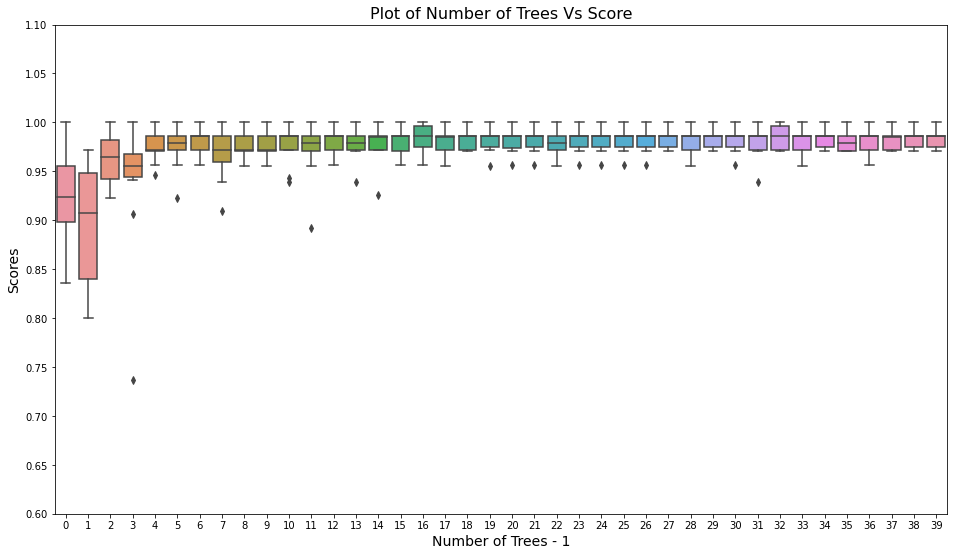

In [15]:
# plot the scores of the random forests as a function of the number of trees

 
plt.figure(figsize=(16,9))

# box Plot of Number of Trees Vs Score
#sns.set_style("whitegrid") 
sns.boxplot(data = df_random_forest.Score)

plt.title("Plot of Number of Trees Vs Score", fontsize=16)
plt.xlabel( "Number of Trees - 1", fontsize=14)
plt.ylabel("Scores", fontsize=14)
plt.yticks(np.arange(0.6, 1.1, 0.05))
sns.set_context('poster')

In [41]:
# We shall build a random forest classifier with n_estimator = 23

In [42]:
## Train random forest classifier on the data using 26 trees. 
clf1 = sklearn.ensemble.RandomForestClassifier(n_estimators=23)

clf1 = clf1.fit(X,Y)

# obtain the relative importance of the features 
feature_imp1 = clf1.feature_importances_

#get column names
columns = X_df.columns

print ("n_estimators = 23",feature_imp1)

n_estimators = 23 [0.11752833 0.12524638 0.26620569 0.16300531 0.14113936 0.18687494]


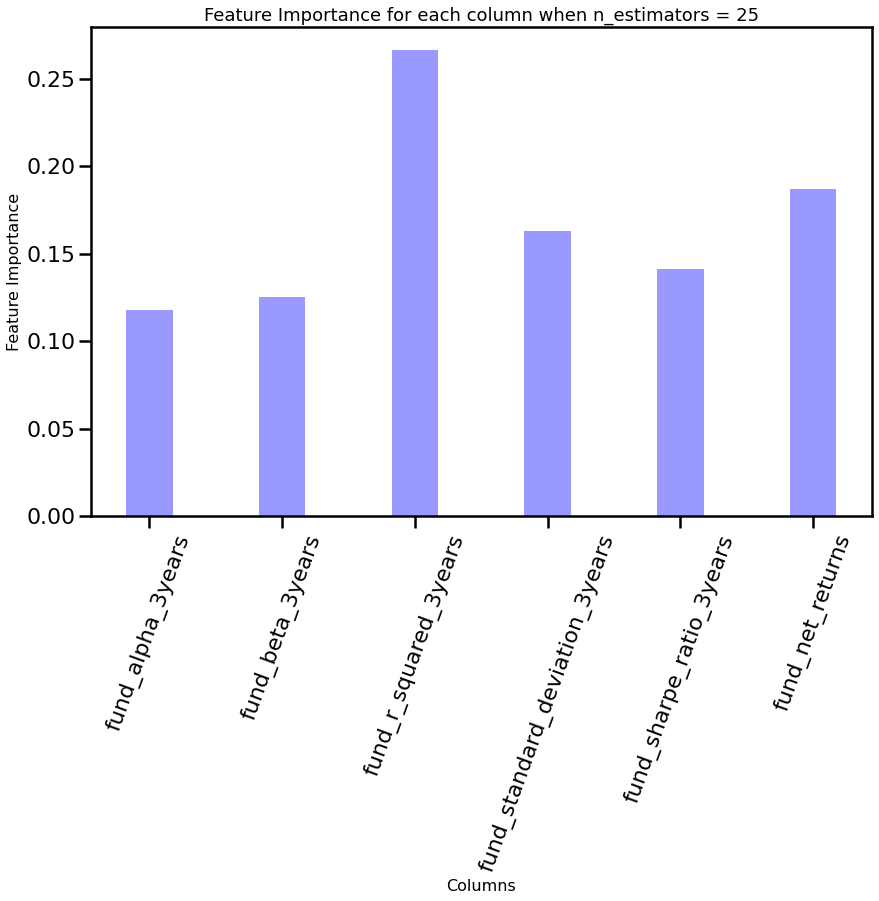

In [43]:
# Show a bar plot of feature imp of named features

index = np.arange(len(columns))
bar_width = 0.35
opacity = 0.4

plt.figure(figsize=(14,9))
plt.bar(index, feature_imp1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='')

plt.xlabel('Columns', fontsize =16)
plt.ylabel('Feature Importance', fontsize =16)
plt.title('Feature Importance for each column when n_estimators = 25', fontsize =18)
plt.xticks(index, columns,rotation = 70)
plt.show()

In [44]:
# Based on the above result we can say that Beta,R squared, Standard deviation and alpha, are the important fearures when determining the good mutual fund.

# Now predict good/bad funds based on random forest model fitted for X and Y.

In [45]:
# Predict the result
Y_predict1 = clf1.predict(X)
mf_3['predicted_result_25'] = Y_predict1

# sort the result in descending order of returns
good_fund_3_yrs = mf_3.query("predicted_result_25==1").sort_values(by='fund_net_returns', ascending=False).reset_index(drop=True)

In [46]:
#good_fund_3_yrs25.head()
print(good_fund_3_yrs.info())
good_fund_3_yrs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   fund_name                       357 non-null    object 
 1   net_annual_expense_ratio_fund   357 non-null    float64
 2   fund_return_3years              357 non-null    float64
 3   fund_mean_annual_return_3years  357 non-null    float64
 4   fund_return_2018                357 non-null    float64
 5   fund_return_2017                357 non-null    float64
 6   fund_return_2016                357 non-null    float64
 7   fund_alpha_3years               357 non-null    float64
 8   fund_beta_3years                357 non-null    float64
 9   fund_r_squared_3years           357 non-null    float64
 10  fund_standard_deviation_3years  357 non-null    float64
 11  fund_sharpe_ratio_3years        357 non-null    float64
 12  fund_net_returns                357 

,fund_name,net_annual_expense_ratio_fund,fund_return_3years,fund_mean_annual_return_3years,fund_return_2018,fund_return_2017,fund_return_2016,fund_alpha_3years,fund_beta_3years,fund_r_squared_3years,fund_standard_deviation_3years,fund_sharpe_ratio_3years,fund_net_returns,predicted_result_25
0,PGOEX,0.53,19.79,1.58,2.69,31.45,6.80,4.63,1.08,86.77,12.52,1.41,19.26,1
1,PGODX,0.63,19.68,1.57,2.58,31.34,6.66,4.53,1.08,86.67,12.53,1.40,19.05,1
2,PGOYX,0.66,19.63,1.57,2.55,31.28,6.62,4.48,1.08,86.71,12.52,1.40,18.97,1
3,EKONX,0.85,19.56,1.58,0.39,34.90,0.57,3.40,1.18,86.66,13.66,1.29,18.71,1
4,PBCKX,0.65,19.24,1.53,2.96,28.86,8.87,4.93,1.01,86.28,11.72,1.46,18.59,1


In [47]:
# First we will see he relationship between expense ratio and Returns
# using scatter plot for top performing funds

good_fund_3_yrs.to_json('3y_top.json')

In [48]:
good_fund_3_yrs.columns

Index(['fund_name', 'net_annual_expense_ratio_fund', 'fund_return_3years',
       'fund_mean_annual_return_3years', 'fund_return_2018',
       'fund_return_2017', 'fund_return_2016', 'fund_alpha_3years',
       'fund_beta_3years', 'fund_r_squared_3years',
       'fund_standard_deviation_3years', 'fund_sharpe_ratio_3years',
       'fund_net_returns', 'predicted_result_25'],
      dtype='object')

Text(0, 0.5, 'Expense Ratio')

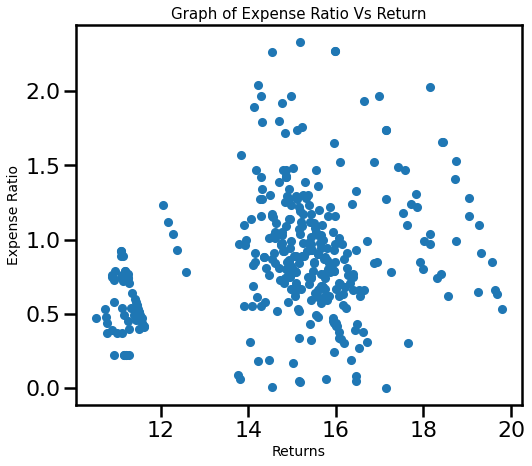

In [49]:
#Plot Returns  Vs Expense ratio
plt.figure(figsize=(8,7))
x=good_fund_3_yrs.fund_return_3years
y=good_fund_3_yrs.net_annual_expense_ratio_fund
plt.scatter(x,y,s=50)
plt.title("Graph of Expense Ratio Vs Return", fontsize=15)
plt.xlabel("Returns" , fontsize=14)
plt.ylabel("Expense Ratio", fontsize=14)

In [50]:
# From the above graph we can say that fund with higher return 
# usually have low expense ratio.

In [51]:
# This function plots a graph of Returns Vs Standard deviation

def plot_returns_vs_risk(good_funds):
    x_arr= good_funds.fund_net_returns
    y_arr= good_funds.fund_standard_deviation_3years

    plt.figure(figsize=(48,40))

    plt.scatter(x_arr, y_arr)
    plt.xlabel('Net Returns ( Returns - Expense Ratio )')
    plt.ylabel('Risk')
    
    for label, x, y in zip(good_funds.fund_name, x_arr, y_arr):
        plt.annotate(
            label, 
            xy = (x, y), xytext = (20, -20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

Text(0.5, 1.0, 'Graph of Net Returns Vs Risk for 3 Years')

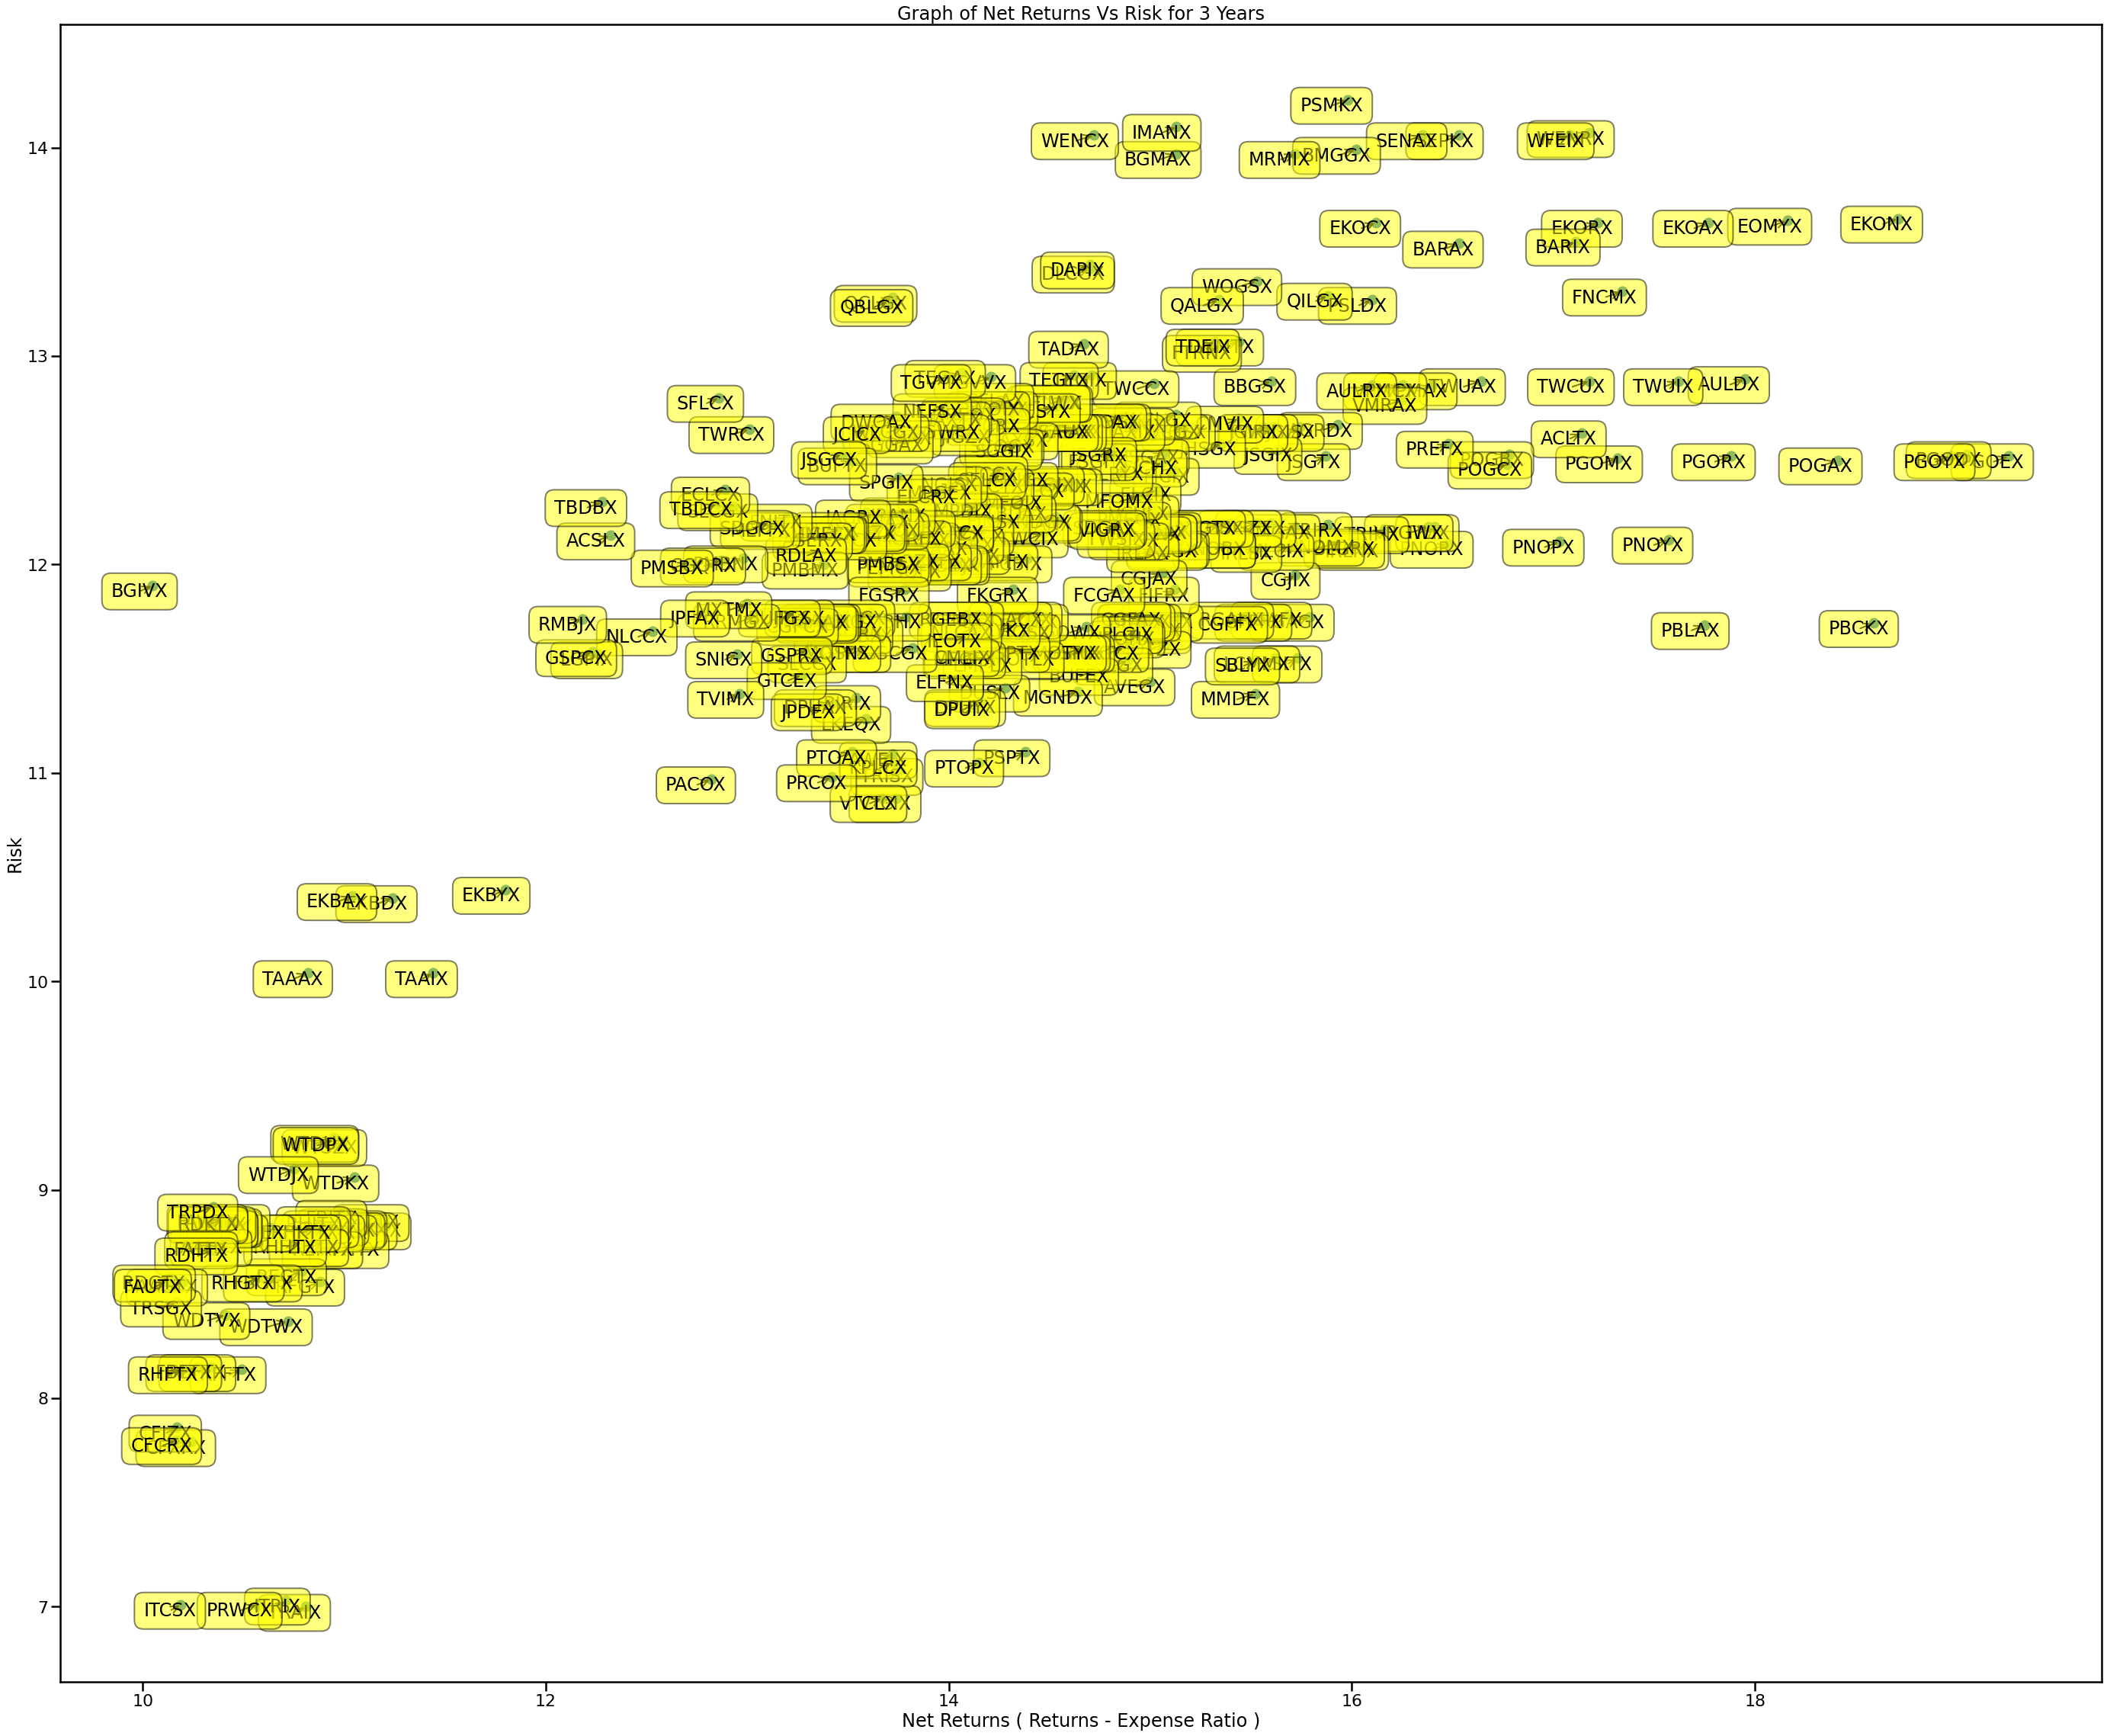

In [52]:
plot_returns_vs_risk(good_fund_3_yrs)
plt.title("Graph of Net Returns Vs Risk for 3 Years")

As we can see, that the funds are clustured together so the above graph
is not readable. We will divide the graph into 3 parts as follows :

Category 1 - Good funds with risk< 10 and returns < 18 %

Category 2 - Good funds with risk >=10 and returns < 18 %

Category 3 - Good funds with risk < 13 and returns > 18 %

Text(0.5, 1.0, 'Good funds for 3 Years with risk < 10% and returns < 18%')

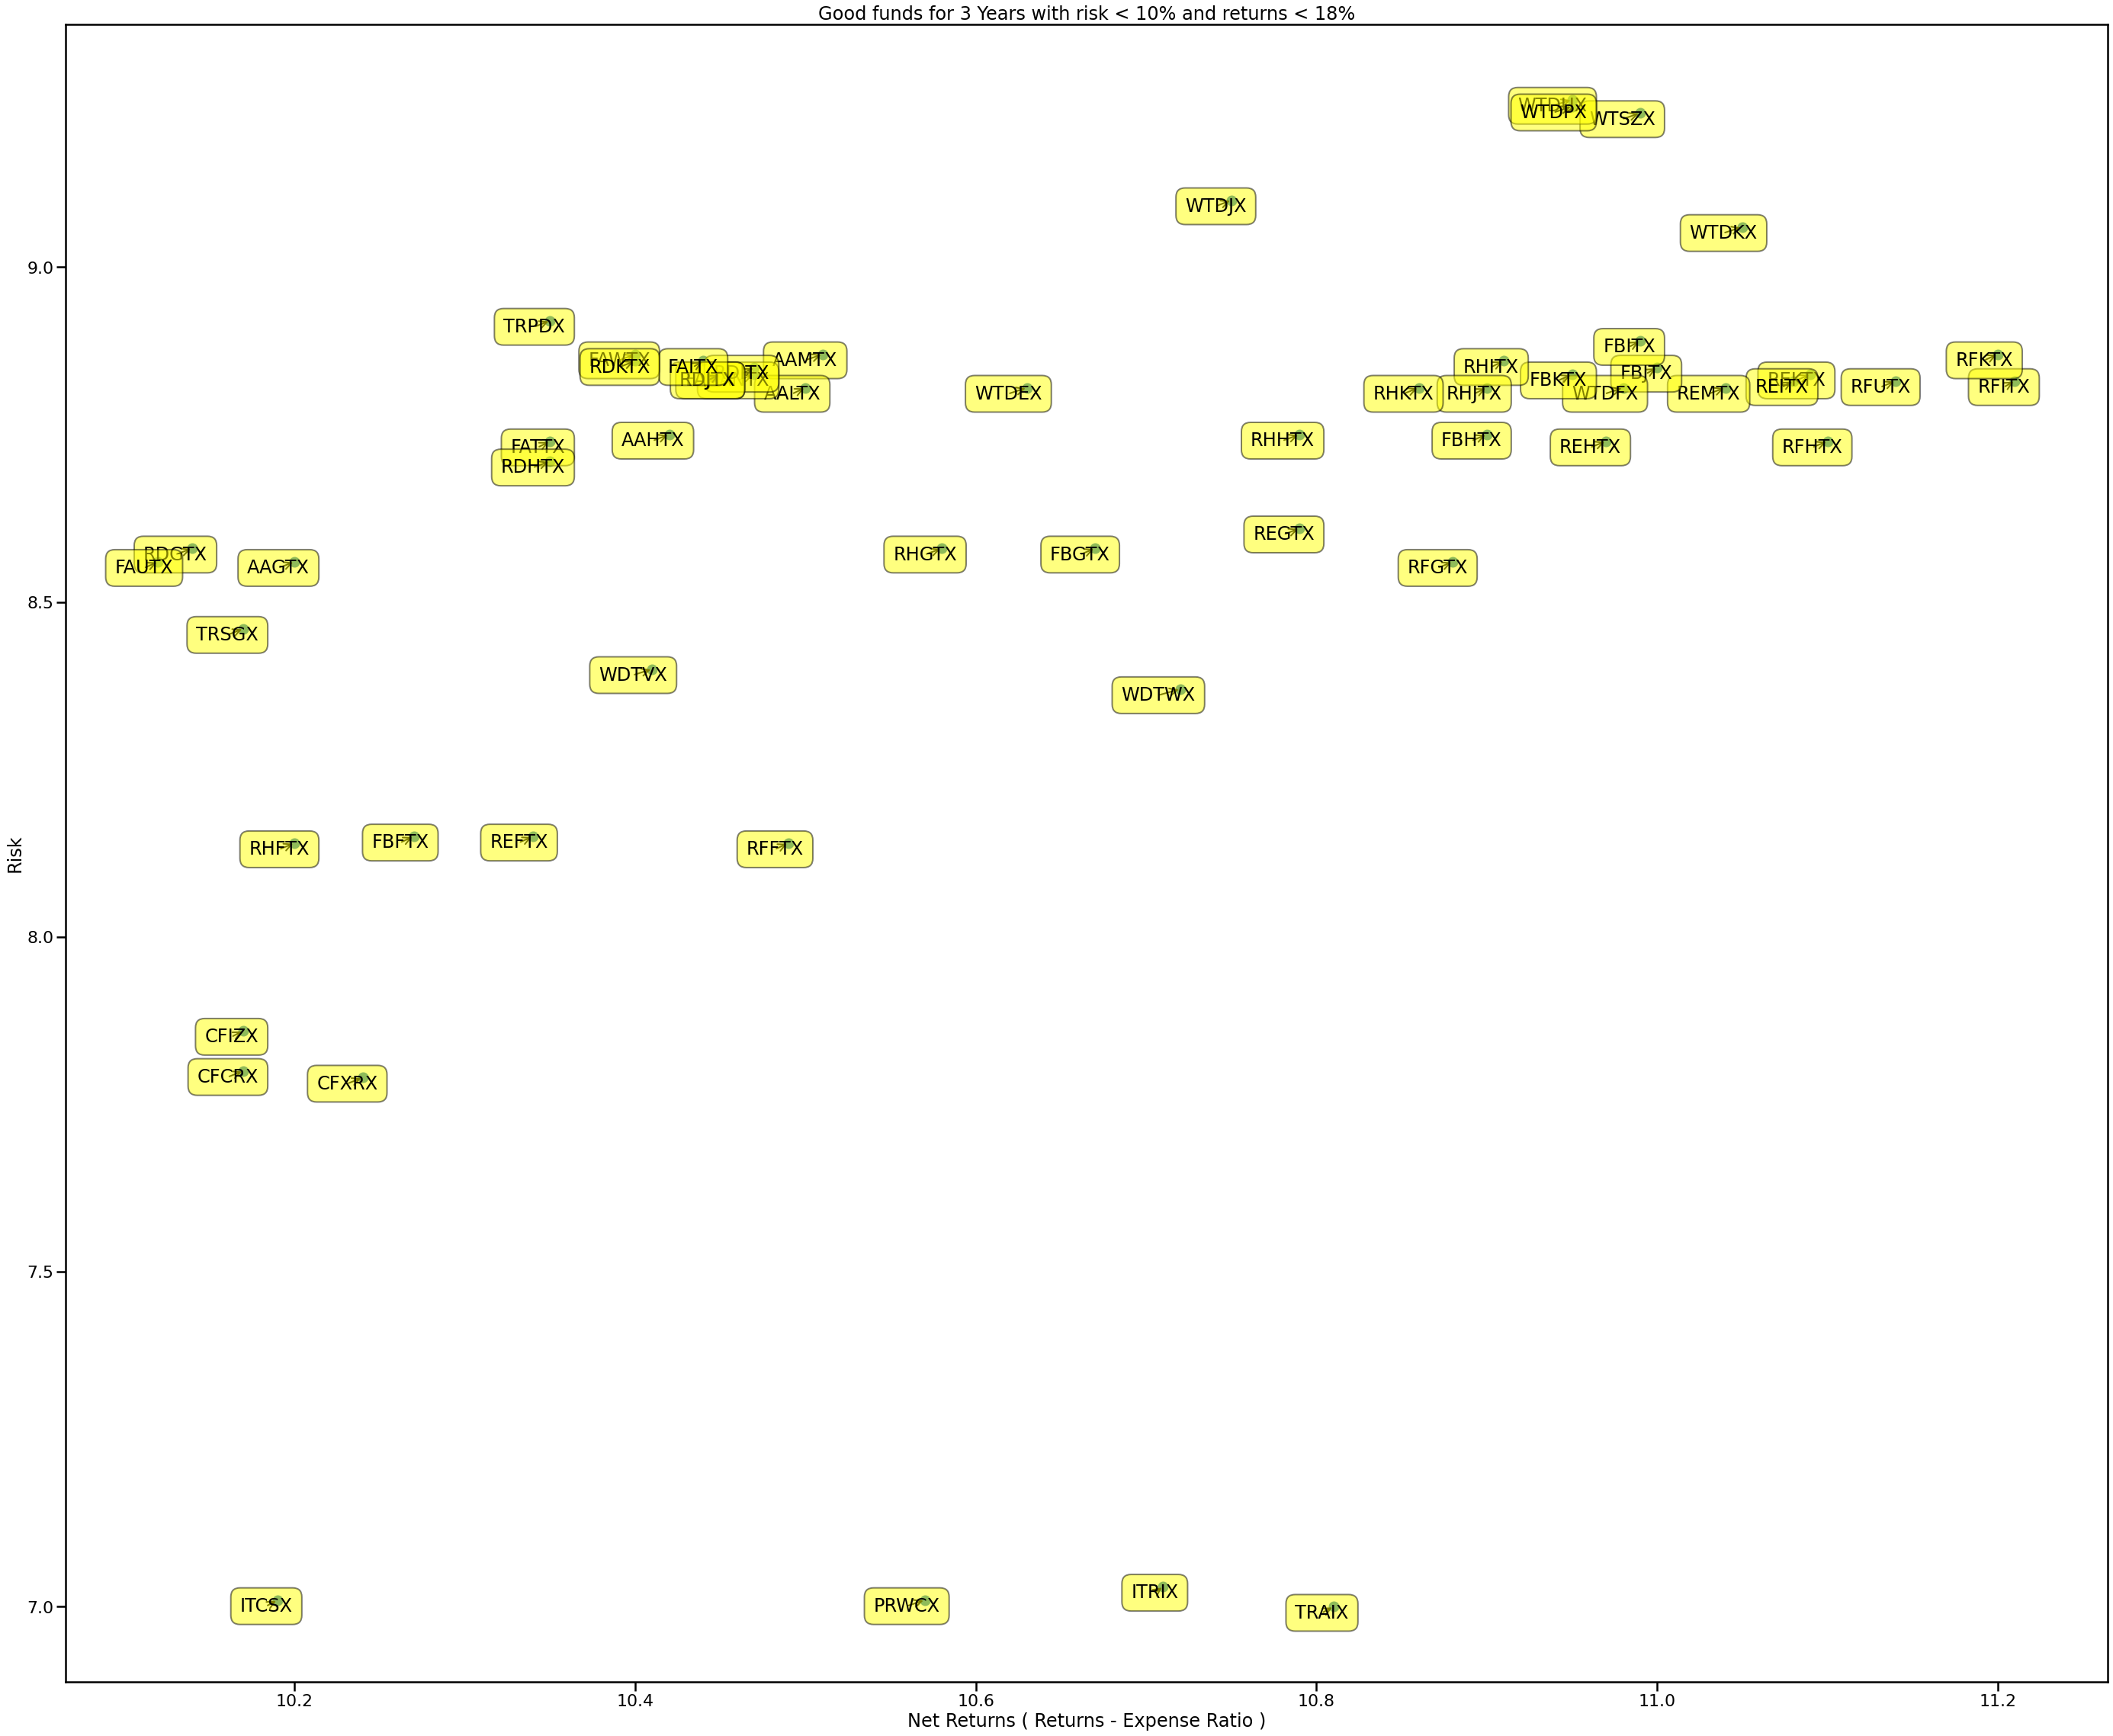

In [53]:
# Category 1 
good_funds = good_fund_3_yrs.query('fund_standard_deviation_3years<10 & fund_net_returns<18')
plot_returns_vs_risk(good_funds)
plt.title("Good funds for 3 Years with risk < 10% and returns < 18%")

Text(0.5, 1.0, 'Good funds for 3 Years with risk >= 10% and returns < 18%')

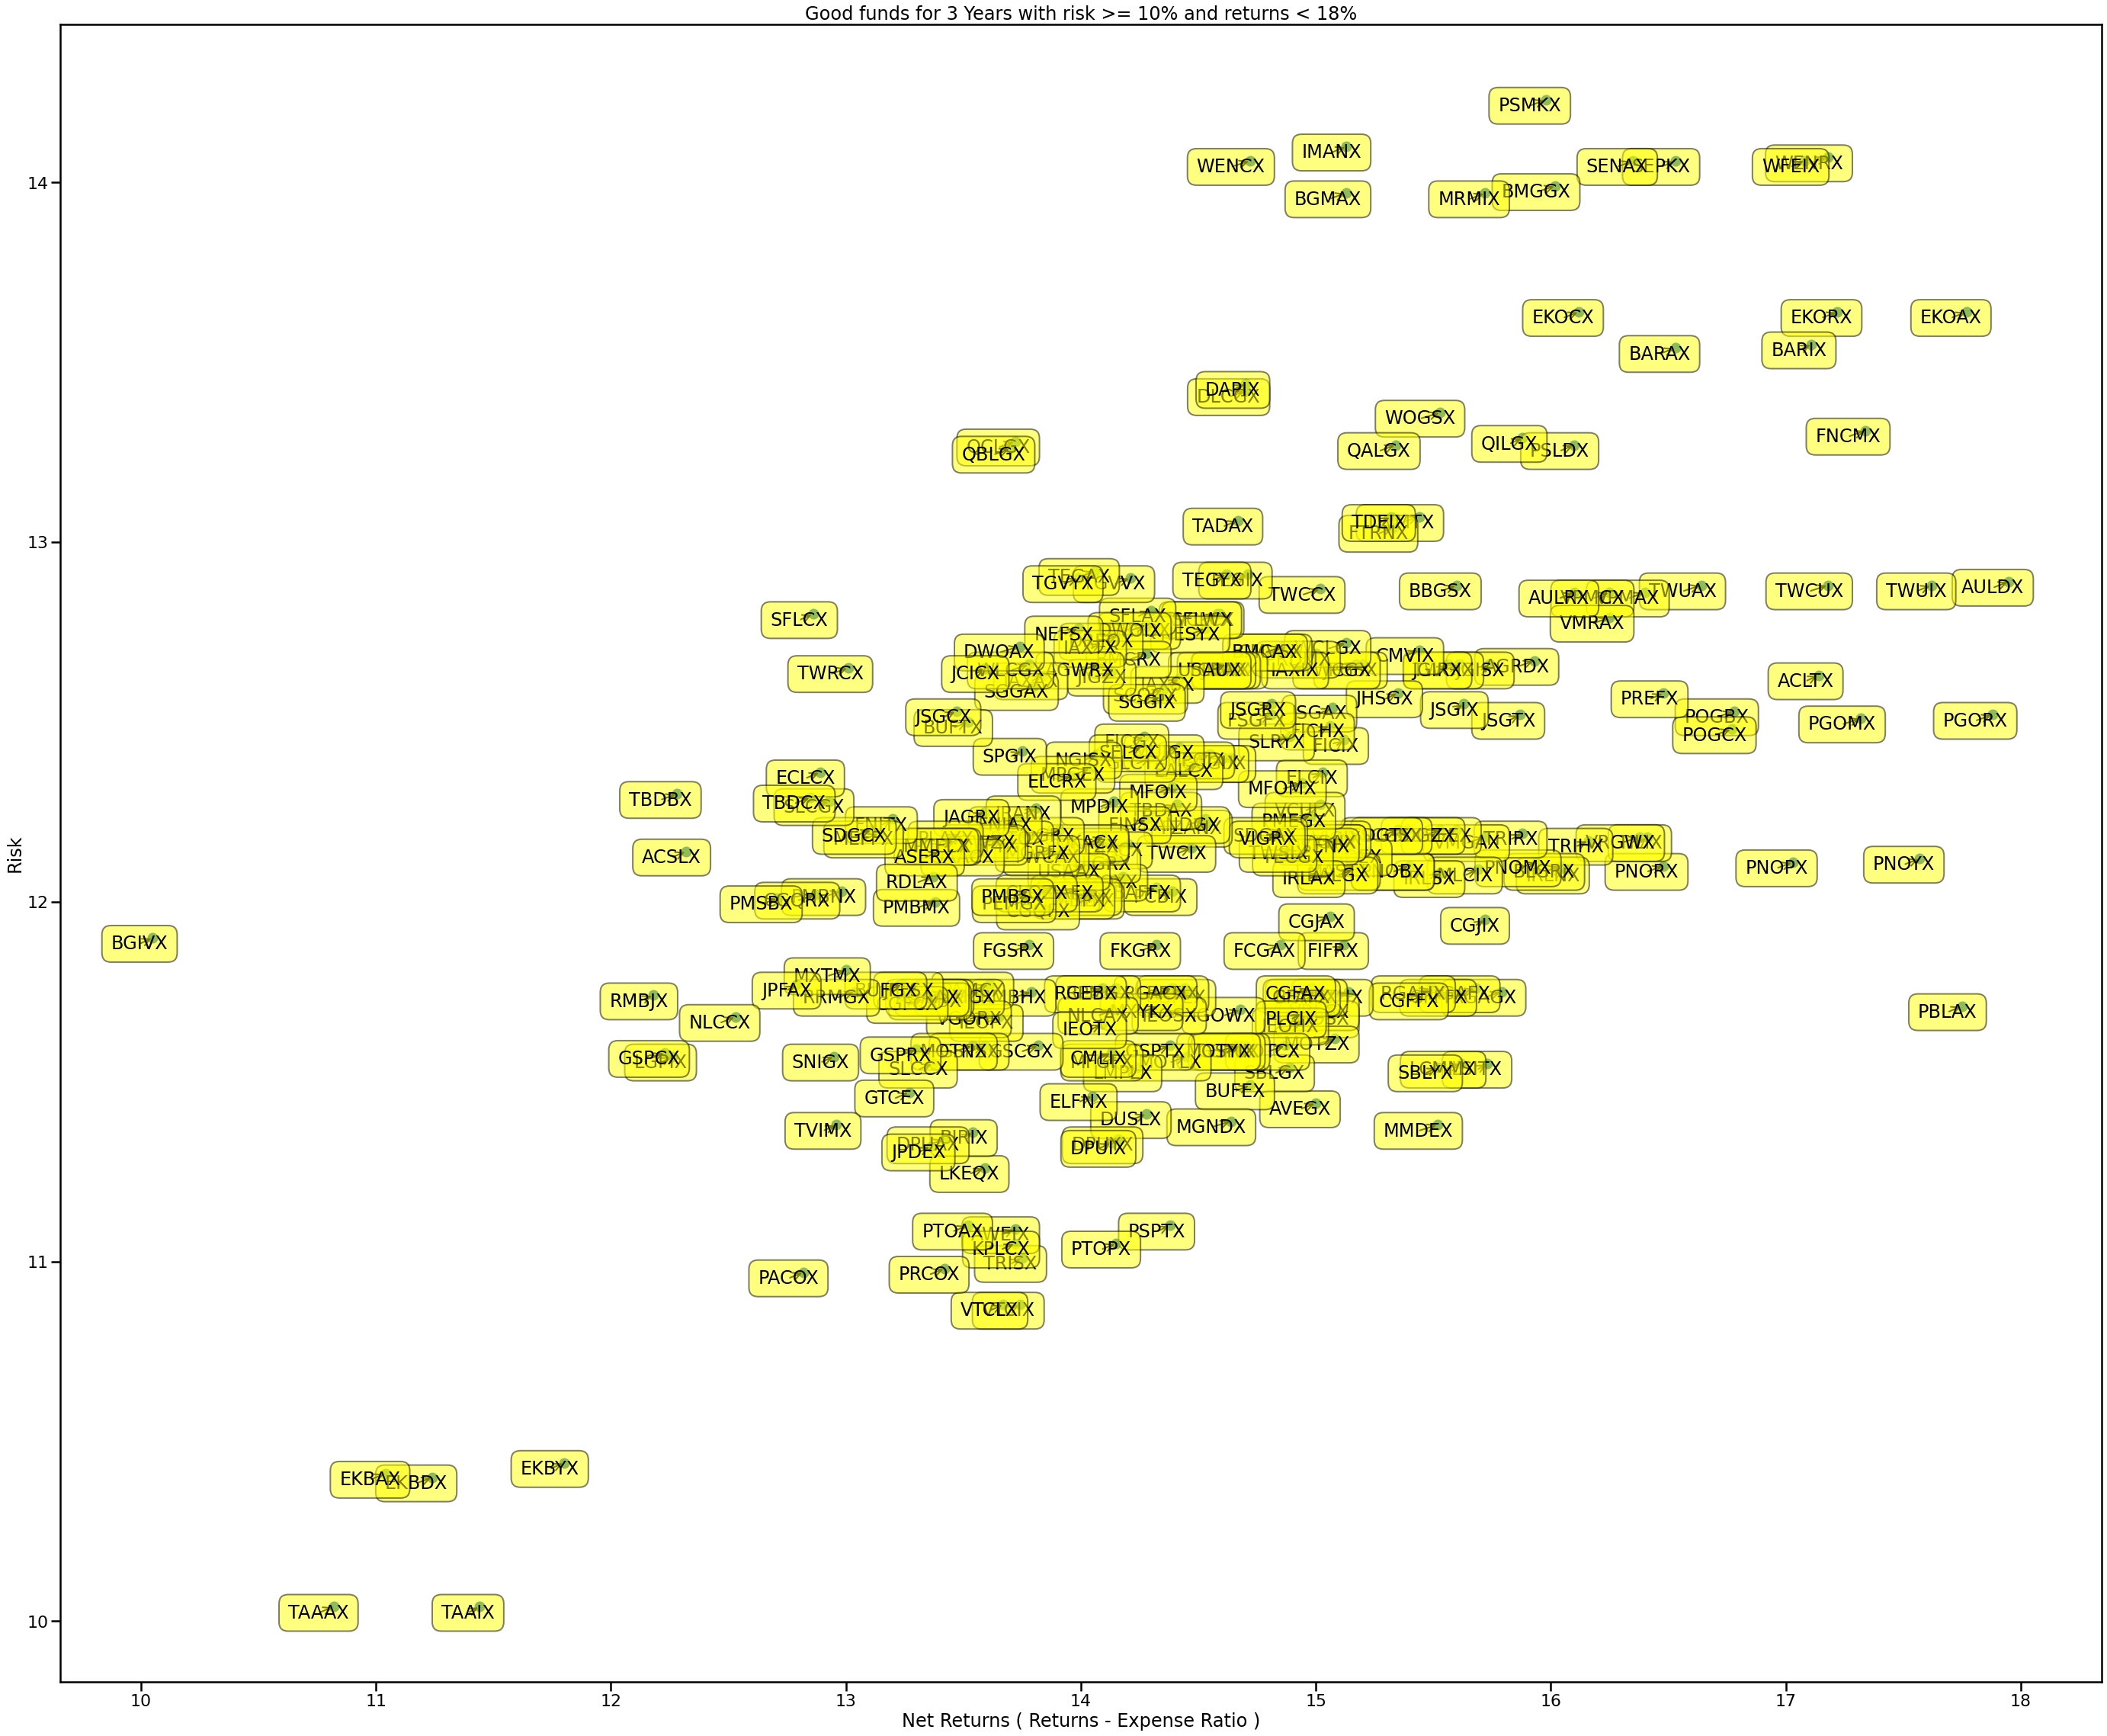

In [54]:
# Category 2 
good_funds =good_fund_3_yrs.query('fund_standard_deviation_3years>=10 & fund_net_returns<18')
plot_returns_vs_risk(good_funds)
plt.title("Good funds for 3 Years with risk >= 10% and returns < 18%")

Text(0.5, 1.0, 'Good funds for 3 Years with risk < 13% and returns > 18%')

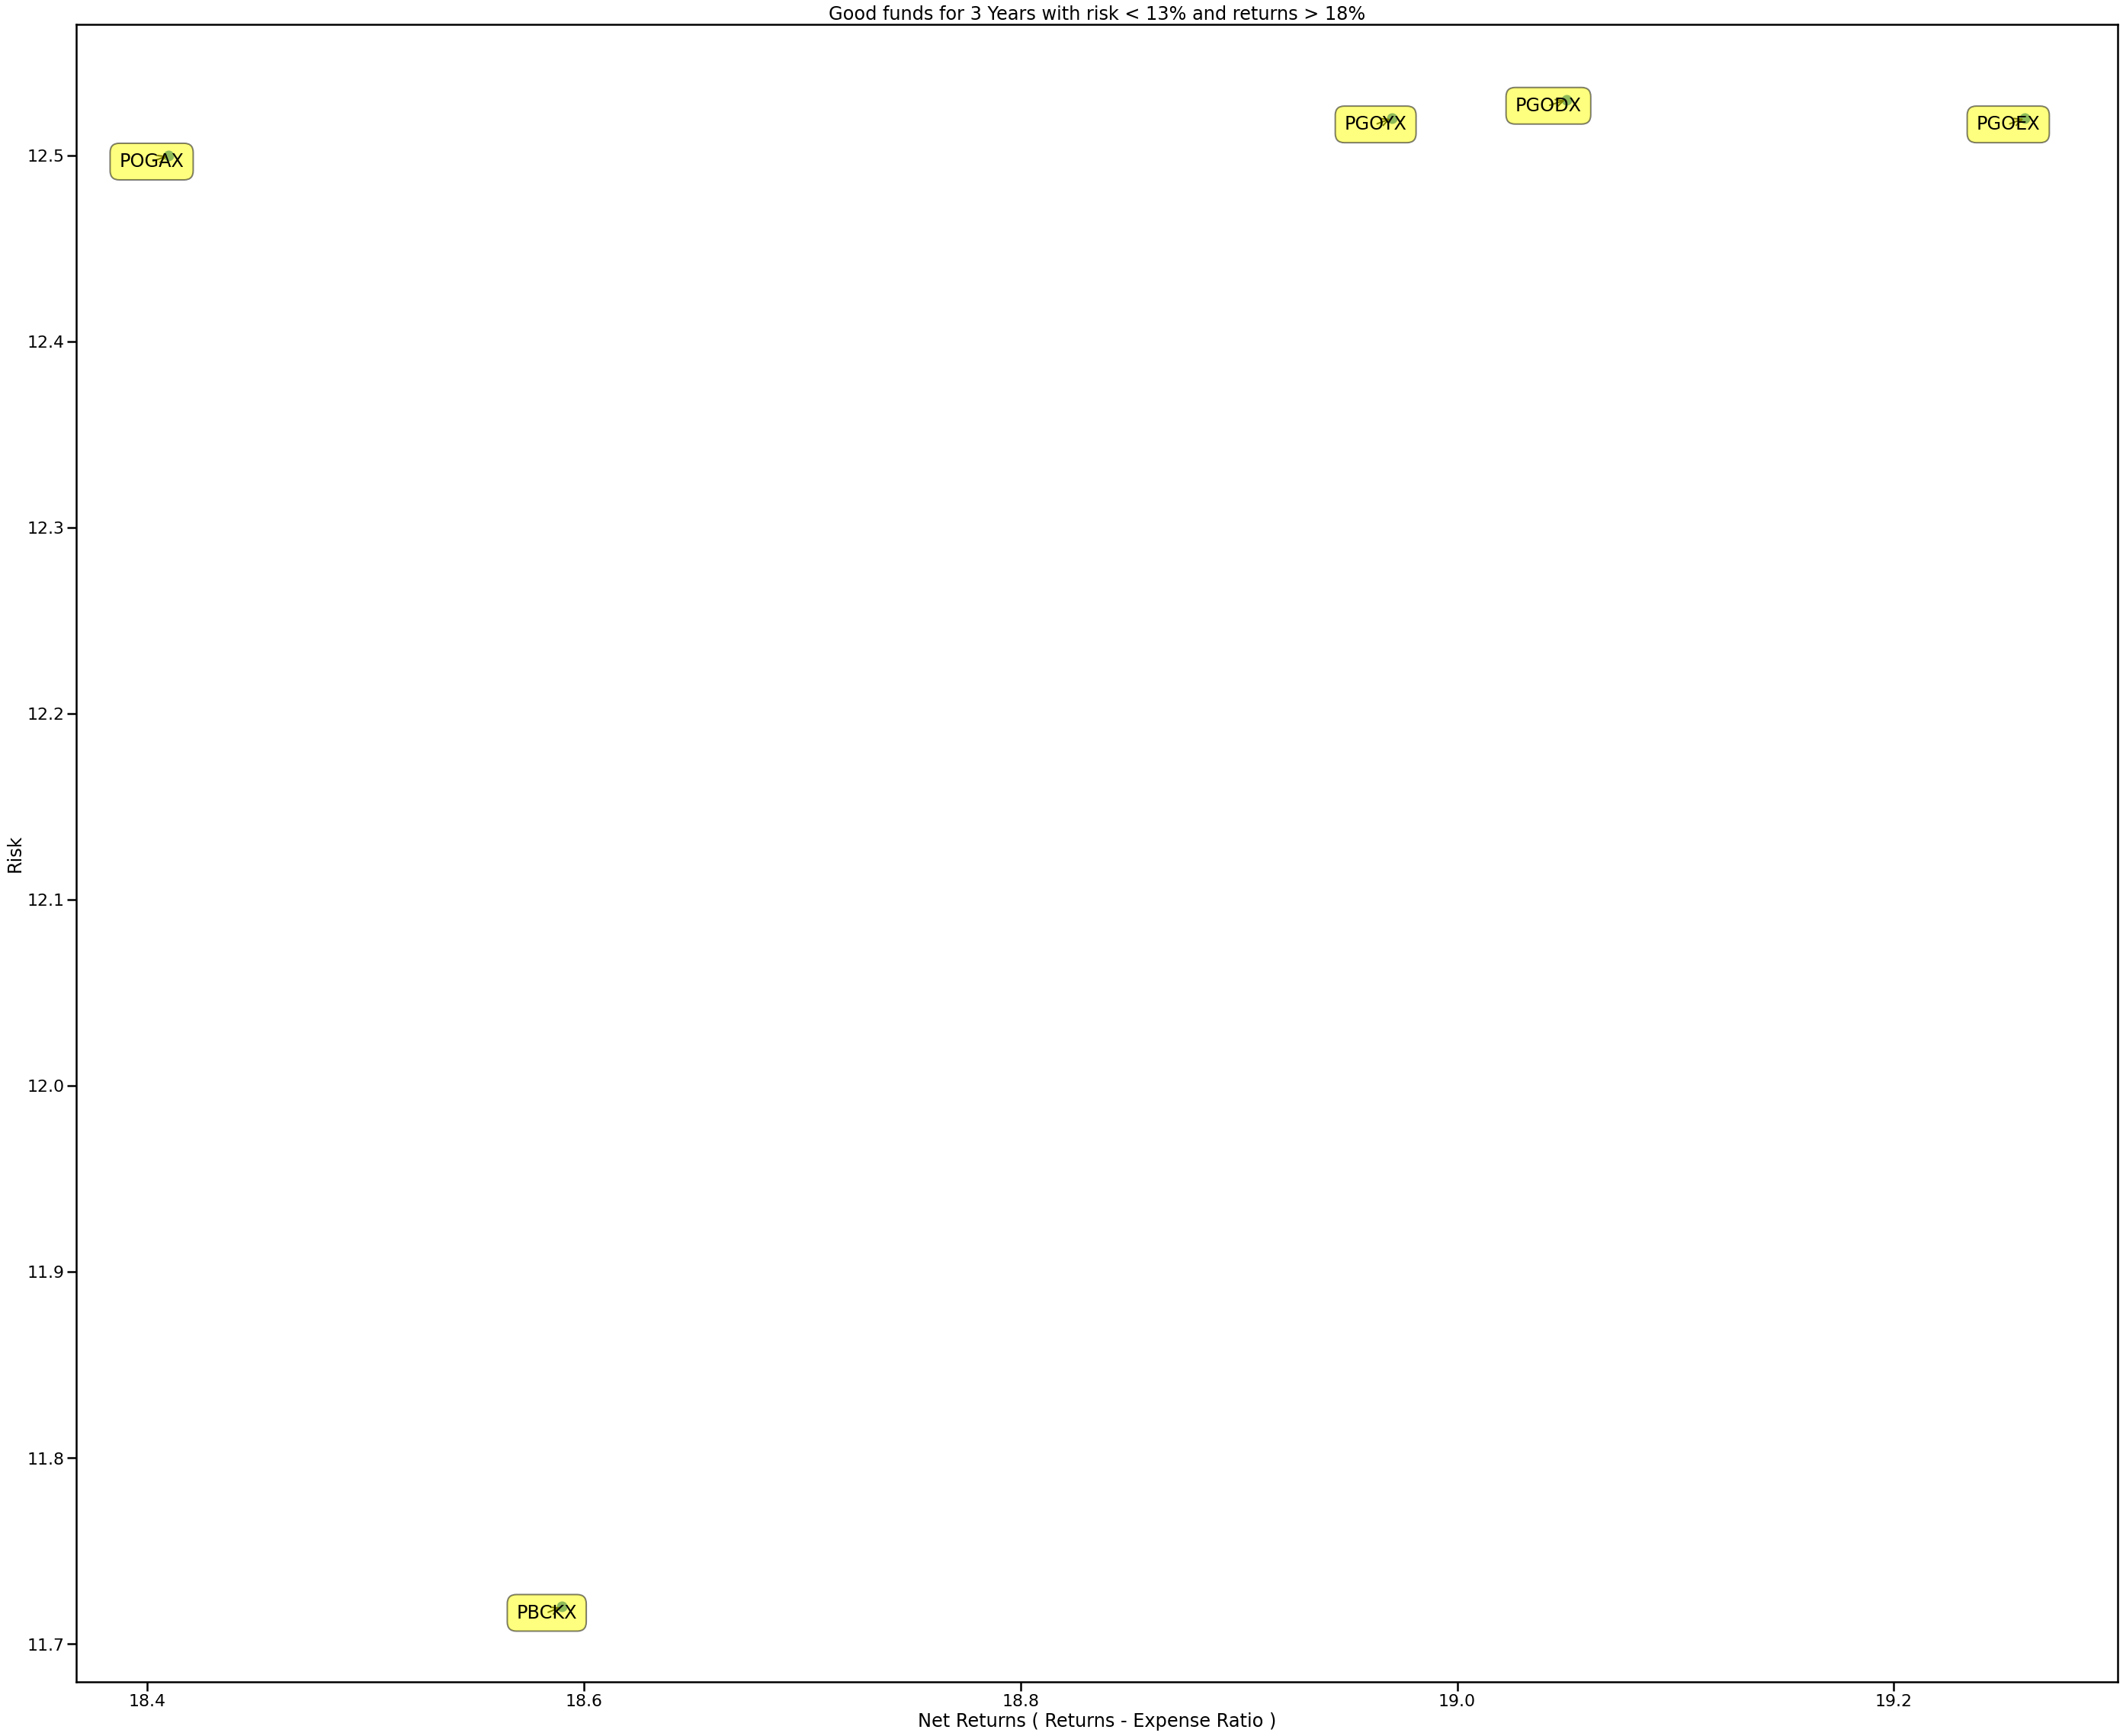

In [55]:
# Category 3 
good_funds = good_fund_3_yrs.query('fund_standard_deviation_3years<13 & fund_net_returns>18')
plot_returns_vs_risk(good_funds)
plt.title("Good funds for 3 Years with risk < 13% and returns > 18%")

In [56]:
# We choose the following 5 funds from the above analysis
select_funds_3yrs = ['PBCKX','PBLAX','POGAX', 'ACLTX', 'TWCUX', 'PGOEX', 'MMDEX']

In [57]:
#Setting the end date to today
#end = datetime.now()
end = '2018-01-01'
start = '2017-01-01'
#Start date set to 1 year back
#start = datetime(end.year-1,end.month,end.day)

In [58]:
price = data.DataReader(select_funds_3yrs, 'yahoo', start, end)['Adj Close']
price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-01-03 to 2017-12-29
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PBCKX   251 non-null    float64
 1   PBLAX   251 non-null    float64
 2   POGAX   251 non-null    float64
 3   ACLTX   251 non-null    float64
 4   TWCUX   251 non-null    float64
 5   PGOEX   251 non-null    float64
 6   MMDEX   251 non-null    float64
dtypes: float64(7)
memory usage: 15.7 KB


In [59]:
price.head()

Symbols,PBCKX,PBLAX,POGAX,ACLTX,TWCUX,PGOEX,MMDEX
Date,,,,,,,
2017-01-03,14.674131,14.576240,21.629049,10.862771,29.532854,22.536985,16.476576
2017-01-04,14.786147,14.696917,21.786989,10.951266,29.767111,22.694344,16.571615
2017-01-05,14.846463,14.757257,21.848410,10.958641,29.825676,22.764278,16.606176
2017-01-06,14.949864,14.860696,22.032675,11.032388,30.026464,22.947863,16.701216
2017-01-09,14.915397,14.826217,22.006351,11.054511,29.959536,22.930380,16.683939


In [60]:
rets = price.pct_change()
rets.head()

Symbols,PBCKX,PBLAX,POGAX,ACLTX,TWCUX,PGOEX,MMDEX
Date,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.007634,0.008279,0.007302,0.008147,0.007932,0.006982,0.005768
2017-01-05,0.004079,0.004106,0.002819,0.000673,0.001967,0.003082,0.002086
2017-01-06,0.006965,0.007009,0.008434,0.006730,0.006732,0.008065,0.005723
2017-01-09,-0.002306,-0.002320,-0.001195,0.002005,-0.002229,-0.000762,-0.001034


In [61]:
corr = rets.corr()
corr

Symbols,PBCKX,PBLAX,POGAX,ACLTX,TWCUX,PGOEX,MMDEX
Symbols,,,,,,,
PBCKX,1.000000,0.998139,0.918098,0.901550,0.884671,0.917467,0.921768
PBLAX,0.998139,1.000000,0.917520,0.900979,0.883867,0.917019,0.921592
POGAX,0.918098,0.917520,1.000000,0.960635,0.958473,0.999356,0.958722
ACLTX,0.901550,0.900979,0.960635,1.000000,0.952689,0.961425,0.960604
TWCUX,0.884671,0.883867,0.958473,0.952689,1.000000,0.957566,0.951946
PGOEX,0.917467,0.917019,0.999356,0.961425,0.957566,1.000000,0.959780
MMDEX,0.921768,0.921592,0.958722,0.960604,0.951946,0.959780,1.000000


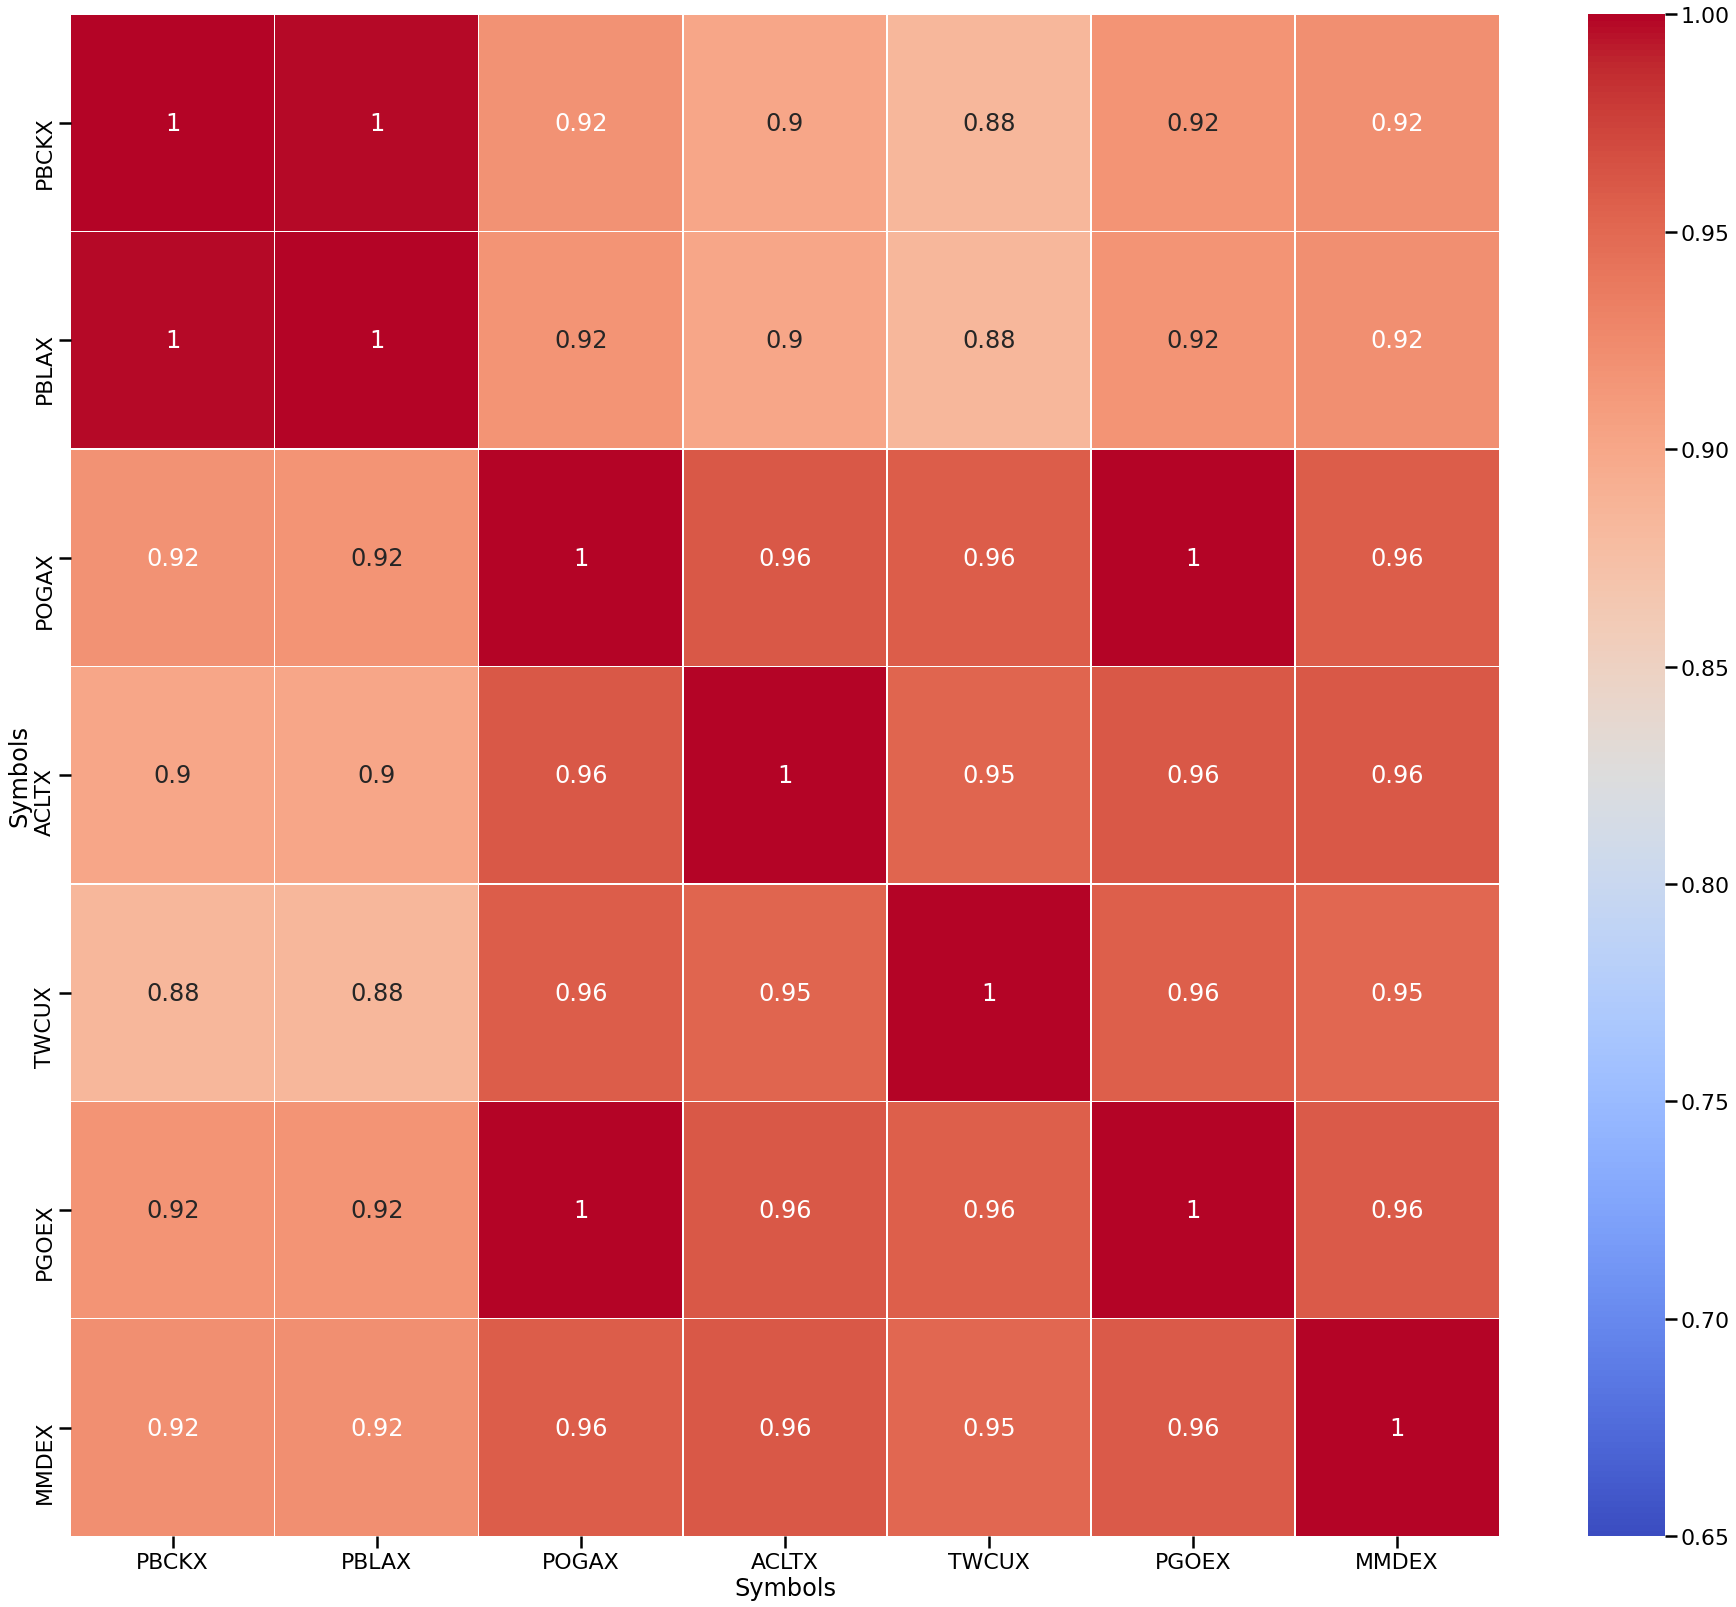

In [62]:
plt.figure(figsize=(32,28))
sns.heatmap(rets.corr(), annot=True, vmin=0.65, vmax=1.0, cmap='coolwarm', linewidths=.25)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BBEAB0F408>,
      dtype=object)

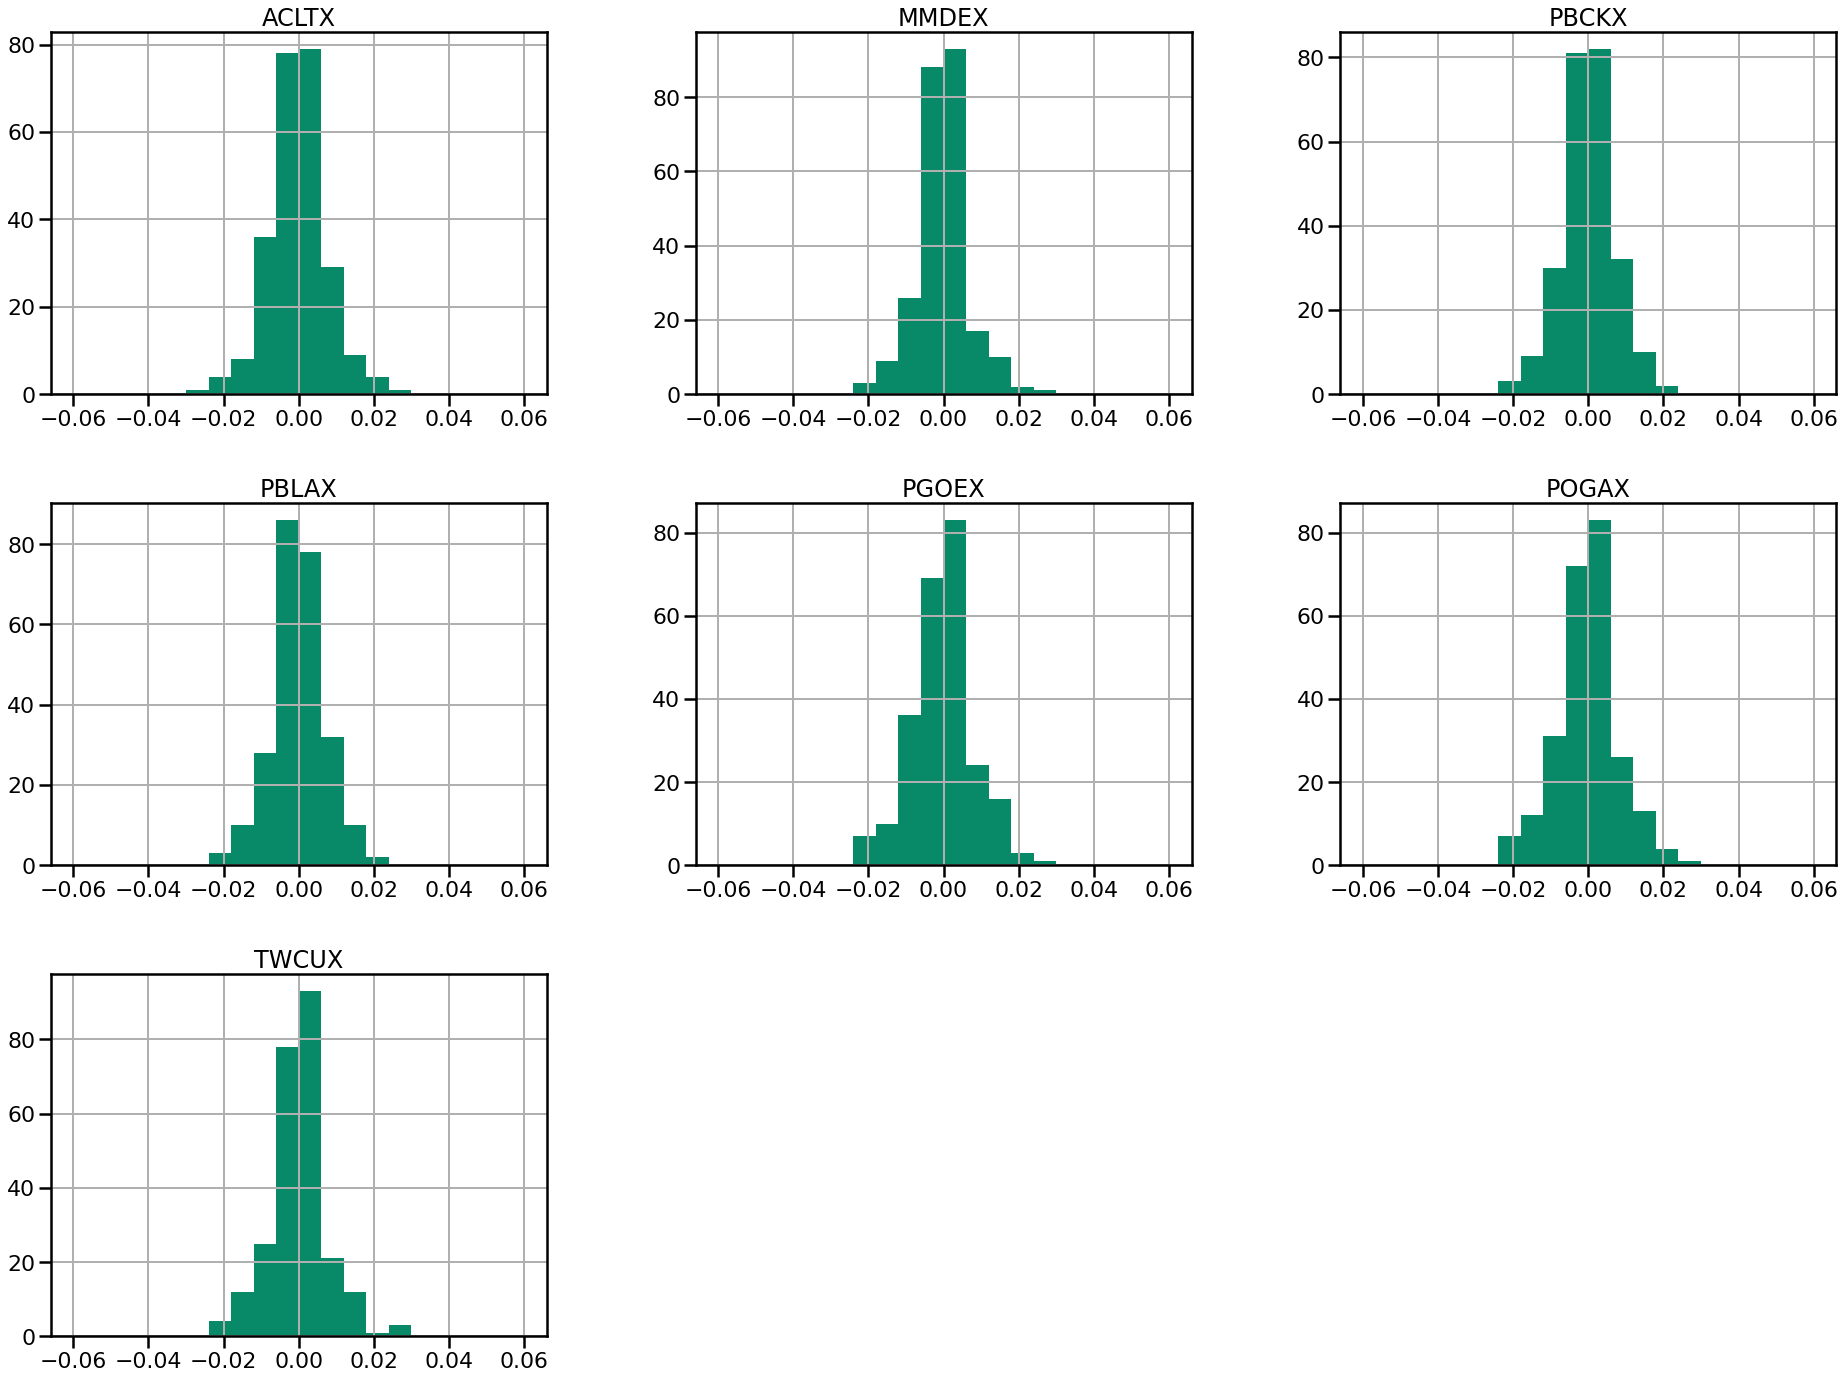

In [63]:
rets.diff().hist(figsize=(32,24),range=(-0.06,0.06),bins=20,color="#088A68")

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
 <a list of 7 Text major ticklabel objects>)

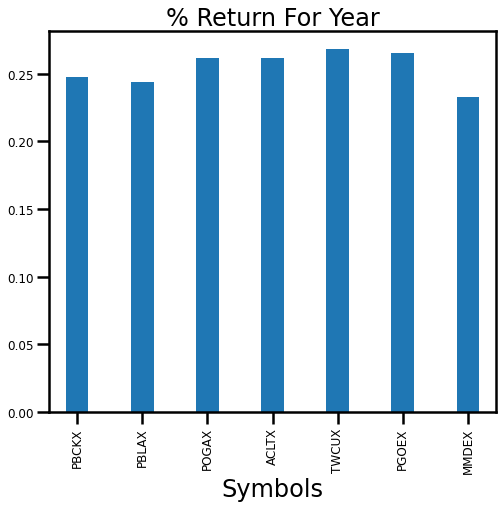

In [64]:
# Percentage returns for each fund for current year
plt.figure(figsize=(8,7))
rets.sum().plot(kind='bar',title="% Return For Year", width=0.35)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

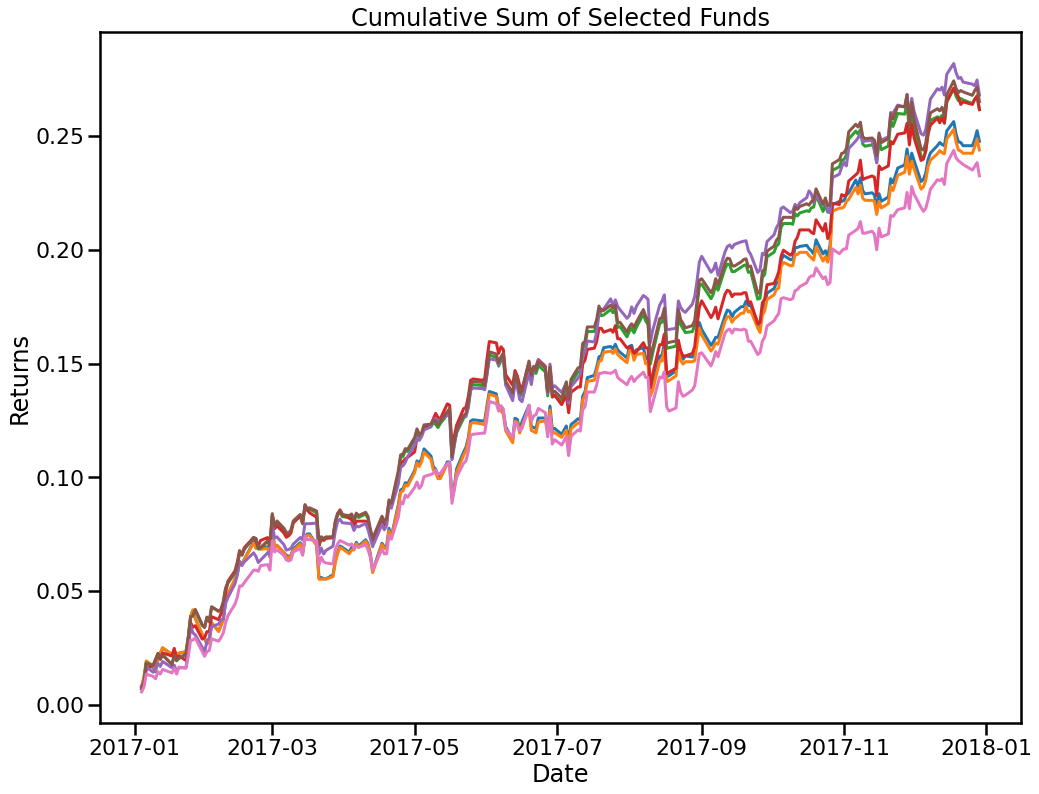

In [65]:
fig = plt.figure(figsize=(16,12))
ax= fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(rets.cumsum())
ax.set_xlabel("Date")
ax.set_ylabel("Returns")
ax.set_title("Cumulative Sum of Selected Funds")
plt.show()

Summary for 3 years investment.
We used Random Foreset classifer to predict top performing funds for 3 year investment. We used cross validtaion to find the best value for n_estimator and predicted top 20 funds for investment. 

Based on our analysis 'PBCKX','PBLAX','POGAX', 'ACLTX', 'TWCUX', 'PGOEX', 'MMDEX' are one of the top performing funds for 3 year investments which give more tha 20% returns with less tha 13% risk. 

Also fund with less expense ratio give more returns for 3 year investment.